In [1]:
import os

root_dir = os.getcwd()
print (os.getcwd()) # cwd = current working directory

d0 = os.path.join(root_dir,"Datasets")
dataset_dir = os.path.join(d0,"archive")

print(dataset_dir)

C:\Users\aksil\DataScience_IA
C:\Users\aksil\DataScience_IA\Datasets\archive


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


image_size = (224, 224)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
)

train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

base_model = tf.keras.applications.VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3)
)

base_model.trainable = False

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')  # Assuming 3 classes: sunrise/sunset, daytime, nighttime
])


model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

test_loss, test_accuracy = model.evaluate(validation_generator)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

model.save('time_of_day_model.h5')


Found 2138 images belonging to 3 classes.
Found 533 images belonging to 3 classes.
Epoch 1/10
66/66 [==============================] - 226s 3s/step - loss: 1.0492 - accuracy: 0.6462 - val_loss: 0.5446 - val_accuracy: 0.7988
Epoch 2/10
66/66 [==============================] - 235s 4s/step - loss: 0.5265 - accuracy: 0.7825 - val_loss: 0.4401 - val_accuracy: 0.8262
Epoch 3/10
66/66 [==============================] - 234s 4s/step - loss: 0.4316 - accuracy: 0.8338 - val_loss: 0.3962 - val_accuracy: 0.8477
Epoch 4/10
66/66 [==============================] - 228s 3s/step - loss: 0.3723 - accuracy: 0.8628 - val_loss: 0.3996 - val_accuracy: 0.8457
Epoch 5/10
66/66 [==============================] - 229s 3s/step - loss: 0.3138 - accuracy: 0.8799 - val_loss: 0.3957 - val_accuracy: 0.8574
Epoch 6/10
66/66 [==============================] - 238s 4s/step - loss: 0.2770 - accuracy: 0.9003 - val_loss: 0.4017 - val_accuracy: 0.8496
Epoch 7/10
66/66 [==============================] - 230s 3s/step - loss

1/1 [==============================] - 0s 116ms/step


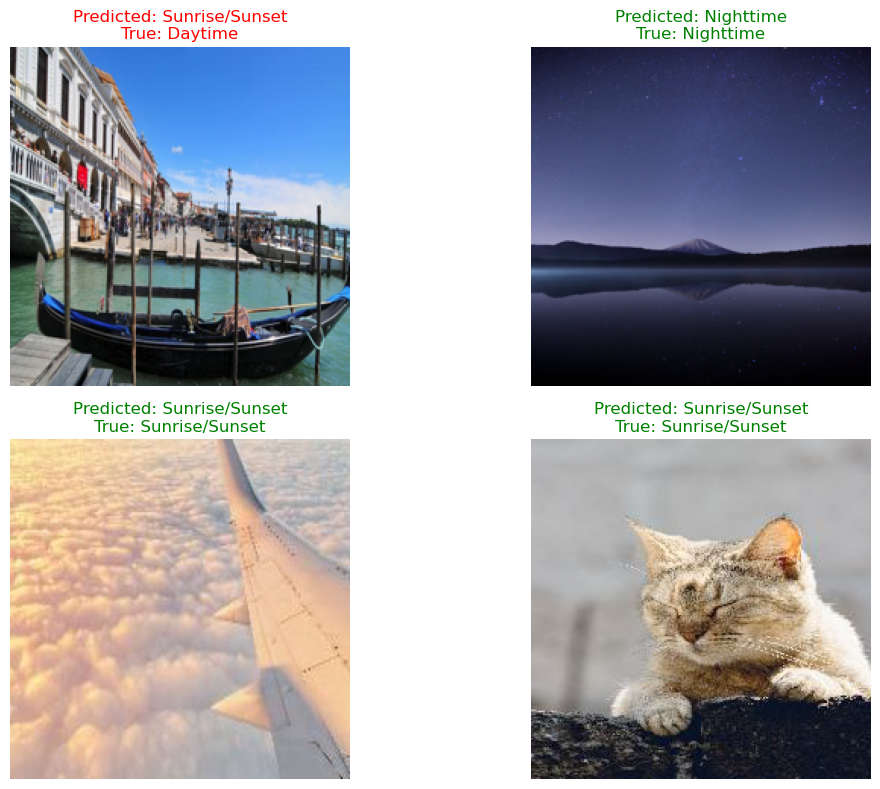

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


model = tf.keras.models.load_model('time_of_day_model.h5')


image_paths = ['C:/Users/aksil/DataScience_IA/Datasets/s0.jpeg',
               'C:/Users/aksil/DataScience_IA/Datasets/d1.jpg',
               'C:/Users/aksil/DataScience_IA/Datasets/s2.jpeg',               
               'C:/Users/aksil/DataScience_IA/Datasets/n1.jpg']

class_labels = ['Sunrise/Sunset', 'Daytime', 'Nighttime']
class_labels_map = {'s0': 'Sunrise/Sunset', 'd1': 'Daytime', 's2': 'Sunrise/Sunset', 'n1': 'Nighttime'}

n_rows = 2
n_cols = 2

fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 8))

np.random.seed(42)
random_indexes = np.random.choice(len(image_paths), size=n_rows * n_cols, replace=False)


for i, index in enumerate(random_indexes):
    
    image_path = image_paths[index]
    image = Image.open(image_path)
    image = image.resize((224, 224))
    image = np.array(image) / 255.0
    image = np.expand_dims(image, axis=0)

    
    predictions = model.predict(image)
    predicted_class_index = np.argmax(predictions)
    predicted_class_label = class_labels[predicted_class_index]

    
    true_class_label = image_path.split('/')[-1].split('.')[0] 
    true_class_label = class_labels_map[true_class_label]  

    
    axs[i // n_cols, i % n_cols].imshow(image[0])
    axs[i // n_cols, i % n_cols].axis('off')
    axs[i // n_cols, i % n_cols].set_title("Predicted: {}\nTrue: {}".format(predicted_class_label, true_class_label),
                                            color='green' if predicted_class_label == true_class_label else 'red')

plt.tight_layout()

plt.show()
